## Wine classification
### Modules et packages

In [53]:
# Visualisation des données
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Pré-traitement des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Pour tester les performances des modèles utilisés
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.svm import SVC

# Resampling 
from sklearn.utils import resample

### 1. Vin blanc
#### a) Chargement des données

In [2]:
data_white_wine = pd.read_csv("./winequality-white.csv", sep=";")
data_white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

#### b) Description et visualisation des données
##### Description globale

In [3]:
data_white_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

On observe maintenant la distribution des différentes classes de vin blanc

In [4]:
data_white_wine.groupby("quality").mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             7.600000          0.333250     0.336000        6.392500   
4             7.129448          0.381227     0.304233        4.628221   
5             6.933974          0.302011     0.337653        7.334969   
6             6.837671          0.260564     0.338025        6.441606   
7             6.734716          0.262767     0.325625        5.186477   
8             6.657143          0.277400     0.326514        5.671429   
9             7.420000          0.298000     0.386000        4.120000   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.054300            53.325000            170.600000  0.994884   
4         0.050098            23.358896            125.279141  0.994277   
5         0.051546            36.432052            150.904598  0.995263   
6         0.045217            35.650591            137.047316  0.993961   
7         0.038191            34.125568            125.114773  0.992452   
8         0.038314            36.720000            126.165714  0.992236   
9         0.027400            33.400000            116.000000  0.991460   

               pH  sulphates    alcohol  
quality                                  
3        3.187500   0.474500  10.345000  
4        3.182883   0.476135  10.152454  
5        3.168833   0.482203   9.808840  
6        3.188599   0.491106  10.575372  
7        3.213898   0.503102  11.367936  
8        3.218686   0.486229  11.636000  
9        3.308000   0.466000  12.180000

On peut avoir un graphique plus représentatif de la distribution de chacune des 11 variables pour chacune des classes de vin qu'on a

Text(0.5, 1.0, 'Alcool')

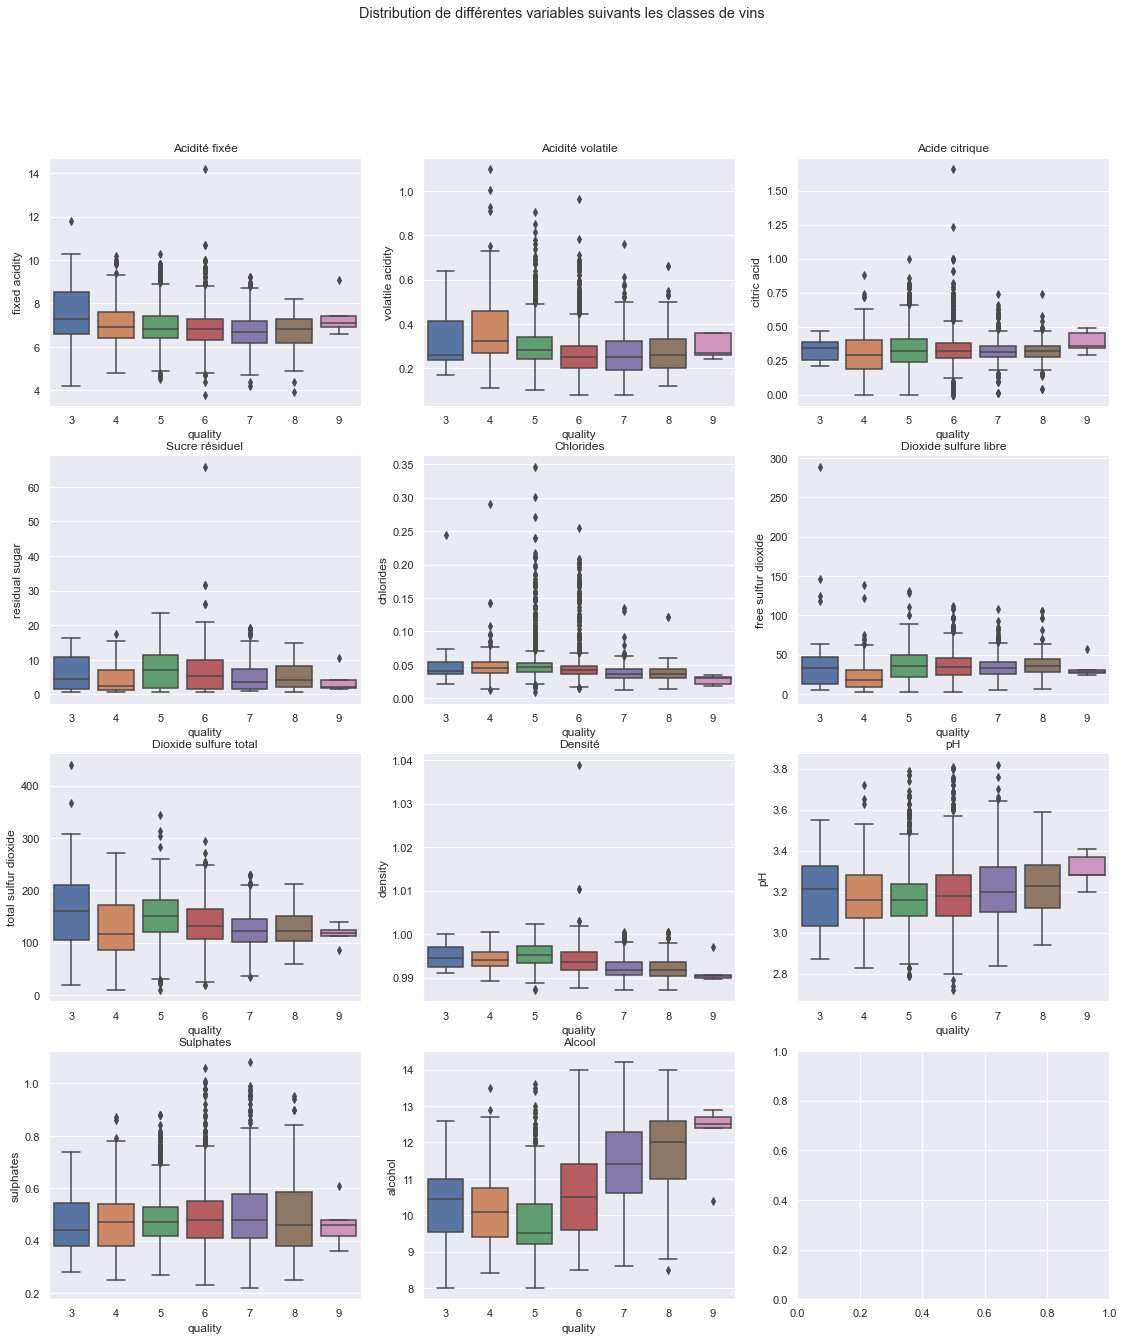

In [14]:
fig, axes = plt.subplots(4, 3, figsize=(19, 21))
fig.suptitle('Distribution de différentes variables suivants les classes de vins')

sns.boxplot(ax=axes[0, 0], data=data_white_wine ,x='quality', y='fixed acidity')
axes[0,0].set_title('Acidité fixée')

sns.boxplot(ax=axes[0, 1], data=data_white_wine ,x='quality', y='volatile acidity')
axes[0,1].set_title('Acidité volatile')

sns.boxplot(ax=axes[0, 2], data=data_white_wine ,x='quality', y='citric acid')
axes[0,2].set_title('Acide citrique')

sns.boxplot(ax=axes[1, 0], data=data_white_wine ,x='quality', y='residual sugar')
axes[1,0].set_title('Sucre résiduel')

sns.boxplot(ax=axes[1, 1], data=data_white_wine ,x='quality', y='chlorides')
axes[1,1].set_title('Chlorides')

sns.boxplot(ax=axes[1, 2], data=data_white_wine ,x='quality', y='free sulfur dioxide')
axes[1,2].set_title('Dioxide sulfure libre')

sns.boxplot(ax=axes[2, 0], data=data_white_wine ,x='quality', y='total sulfur dioxide')
axes[2,0].set_title('Dioxide sulfure total')

sns.boxplot(ax=axes[2, 1], data=data_white_wine ,x='quality', y='density')
axes[2,1].set_title('Densité')

sns.boxplot(ax=axes[2, 2], data=data_white_wine ,x='quality', y='pH')
axes[2,2].set_title('pH')

sns.boxplot(ax=axes[3, 0], data=data_white_wine ,x='quality', y='sulphates')
axes[3,0].set_title('Sulphates')

sns.boxplot(ax=axes[3, 1], data=data_white_wine ,x='quality', y='alcohol')
axes[3,1].set_title('Alcool')

On voit bien comme ça qu'on a certaines variables qui permettent la séparation avec une certaine efficacité les différentes qualités de vin. Aussi on voit bien que la classe 5 du vin est une classe très disparate ayant des valeurs extrêmes dans plusieurs paramètres et ce qui pourra causer des problèmes par la suite pour la classification de ce type de vin

In [5]:
data_white_wine.groupby("quality").count()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                   20                20           20              20   
4                  163               163          163             163   
5                 1457              1457         1457            1457   
6                 2198              2198         2198            2198   
7                  880               880          880             880   
8                  175               175          175             175   
9                    5                 5            5               5   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
quality                                                                        
3               20                   20                    20       20    20   
4              163                  163                   163      163   163   
5             1457                 1457                  1457     1457  1457   
6             2198                 2198                  2198     2198  2198   
7              880                  880                   880      880   880   
8              175                  175                   175      175   175   
9                5                    5                     5        5     5   

         sulphates  alcohol  
quality                      
3               20       20  
4              163      163  
5             1457     1457  
6             2198     2198  
7              880      880  
8              175      175  
9                5        5

Ce qui nous permet de voir que les classes de tailles déséquilibrées ce qui peut biaiser la classification suivant les différentes qualité de vin par la suite. On observe maintenant la matrice de corrélation des données pour voir si on peut réduire la dimensionnalité de notre problème. 

Text(0.5, 1.0, "Matrice d'autocorrélation des données")

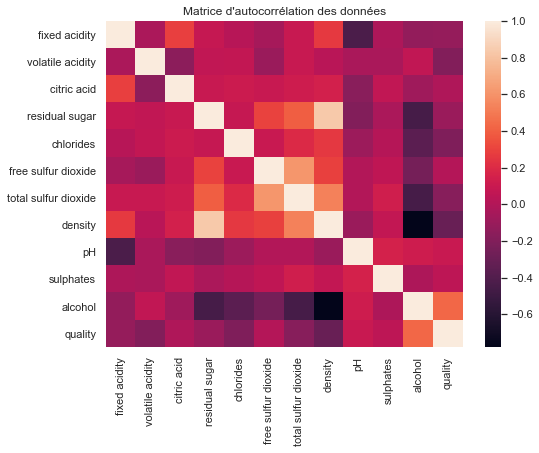

In [6]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
sns.heatmap(data_white_wine.corr())
plt.title("Matrice d'autocorrélation des données")

On voit bien ici qu'on a quelques variables qui sont fortement corrélée : 
- La densité et le sucre résiduel
- Le dioxide de sulfure total et le dioxide de sulfure libre
- La densité et le total de dioxide de sulfure

Ce qui me permet d'avancer le fait qu'on peut diminuer de la dimensionnalité de notre problème. On va continuer la visualisation de nos données et ensuite on va essayer des méthodes de réduction de dimensions

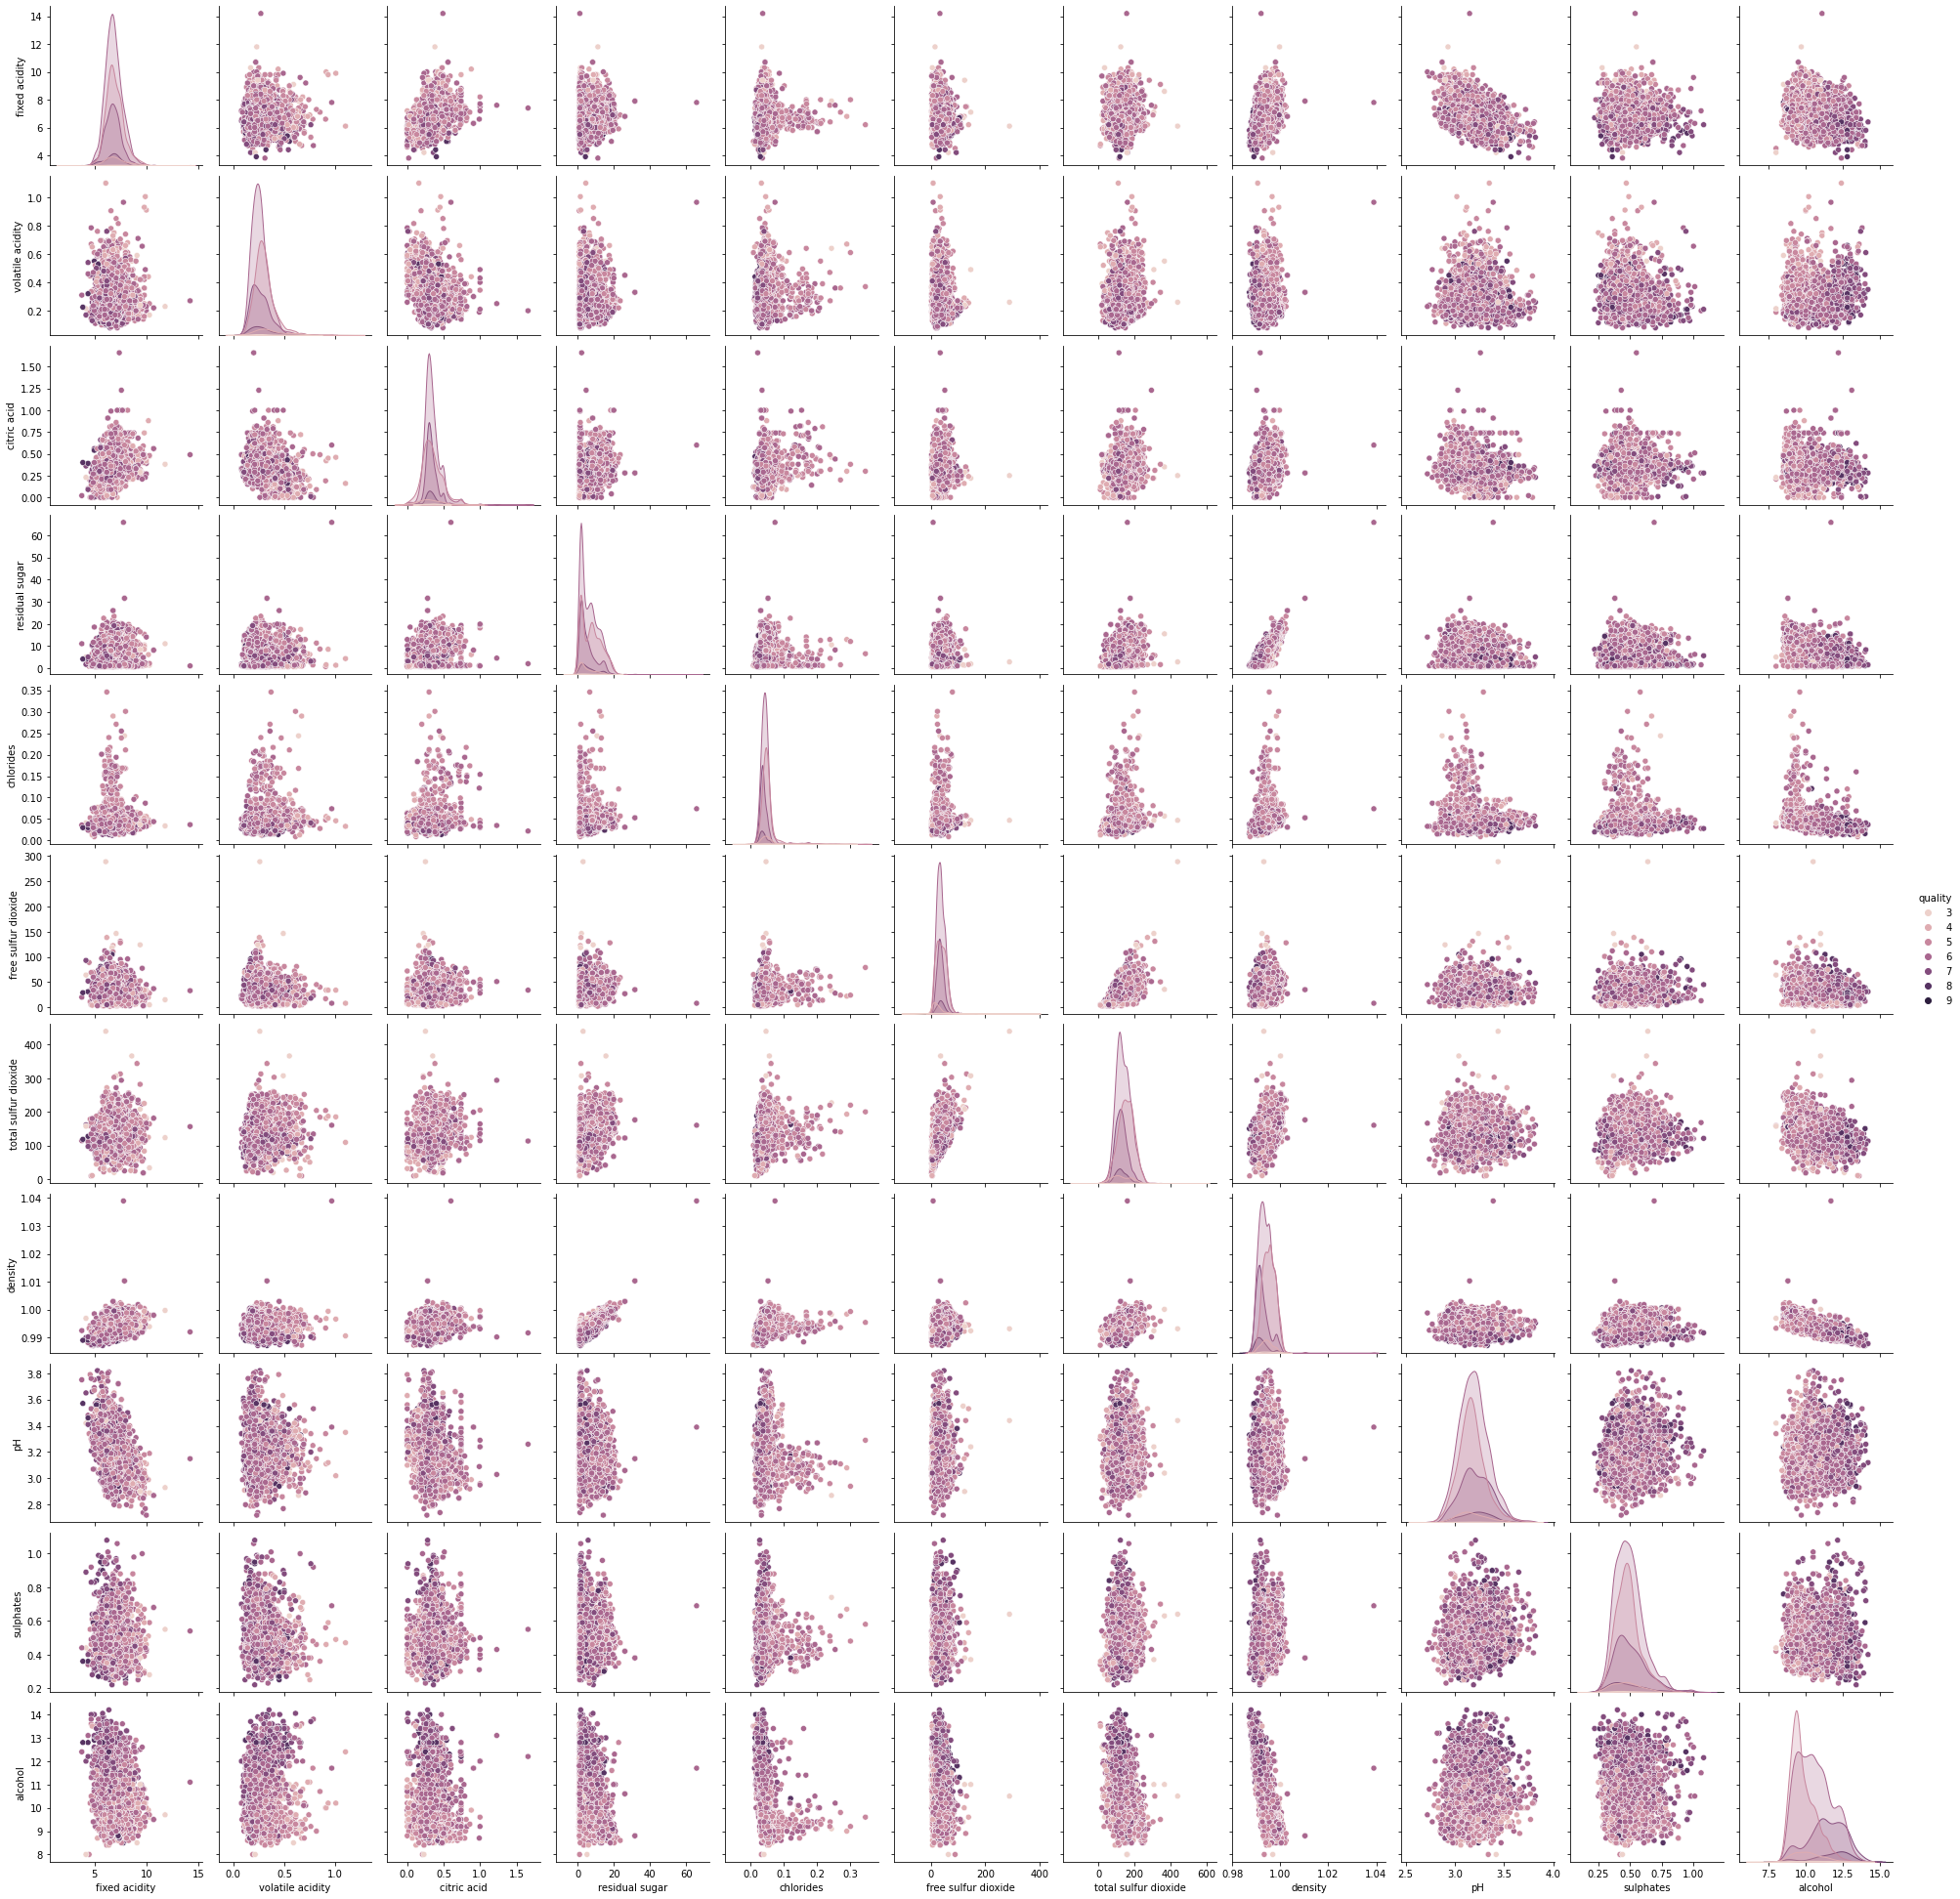

In [6]:
sns.pairplot(data_white_wine, hue='quality')

On observe bien que la majorité des variables ont une distribution normale des données

#### c) Features selection
Le but de cette partie est de parvenir à diminuer de la dimensionalité de notre problème en ne gardant que les variables les moins corrélées et par conséquent qui représentent au mieux notre problème, on va l'utiliser pour deux raisons : 
1) Pour une visualisation plus efficaces de nos données en réduisant la dimensionnalité à 2 ou 3 variables
2) Pour ensuite comparer son utilisation ou pas sur l'application de modèles de classification
##### Normalisation

In [3]:
data_wine_white_features = data_white_wine.copy()
data_wine_white_features.drop("quality", axis=1, inplace=True)
data_white_wine_scaled = StandardScaler().fit_transform(data_wine_white_features)
data_white_wine_scaled = pd.DataFrame(data_white_wine_scaled)
data_white_wine_scaled

0         1         2         3         4         5         6   \
0     0.172097 -0.081770  0.213280  2.821349 -0.035355  0.569932  0.744565   
1    -0.657501  0.215896  0.048001 -0.944765  0.147747 -1.253019 -0.149685   
2     1.475751  0.017452  0.543838  0.100282  0.193523 -0.312141 -0.973336   
3     0.409125 -0.478657 -0.117278  0.415768  0.559727  0.687541  1.121091   
4     0.409125 -0.478657 -0.117278  0.415768  0.559727  0.687541  1.121091   
...        ...       ...       ...       ...       ...       ...       ...   
4893 -0.776015 -0.677101 -0.365197 -0.944765 -0.310008 -0.664970 -1.091000   
4894 -0.301959  0.414339  0.213280  0.317179  0.056196  1.275590  0.697499   
4895 -0.420473 -0.379435 -1.191592 -1.023637 -0.218457 -0.312141 -0.643875   
4896 -1.605613  0.116674 -0.282557 -1.043355 -1.088192 -0.900190 -0.667408   
4897 -1.013043 -0.677101  0.378559 -1.102508 -1.179743 -0.782580 -0.949803   

            7         8         9         10  
0     2.331512 -1.246921 -0.349184 -1.393152  
1    -0.009154  0.740029  0.001342 -0.824276  
2     0.358665  0.475102 -0.436816 -0.336667  
3     0.525855  0.011480 -0.787342 -0.499203  
4     0.525855  0.011480 -0.787342 -0.499203  
...        ...       ...       ...       ...  
4893 -0.965483  0.541334  0.088973  0.557282  
4894  0.291789 -0.253446 -0.261553 -0.743008  
4895 -0.497350 -1.313153 -0.261553 -0.905544  
4896 -1.784717  1.004955 -0.962605  1.857572  
4897 -1.543962  0.475102 -1.488394  1.044891  

[4898 rows x 11 columns]

##### PCA
On extrait les composantes principales de notre dataset nous permettant d'avoir au moins 80% de l'information

In [4]:
pca6 = PCA(n_components=6)
pca_white_wine = pca6.fit_transform(data_white_wine_scaled)
pca_white_wine_df = pd.DataFrame(data = pca_white_wine
             , columns = ['Composante principale 1', 'Composante principale 2', 'Composante principale 3', 'Composante principale 4', 'Composante principale 5', 'Composante principale 6'])
pca_white_wine_df.head()

Composante principale 1  Composante principale 2  Composante principale 3  \
0                 3.676944                -0.545233                -0.930422   
1                -0.644588                 0.430770                -0.356331   
2                 0.155291                -1.189800                -0.017532   
3                 1.455374                 0.099680                -0.001956   
4                 1.455374                 0.099680                -0.001956   

   Composante principale 4  Composante principale 5  Composante principale 6  
0                -1.135374                -0.292855                -0.891620  
1                 0.999117                -0.714078                -0.483738  
2                 0.270219                -0.367706                -0.500682  
3                -0.423022                -0.469981                 0.769261  
4                -0.423022                -0.469981                 0.769261

On analyse maintenant l'information qu'a pris ces deux composantes principales

In [5]:
print('Variance exprimée par composante principale : {}'.format(pca6.explained_variance_ratio_))
print("Indiquant alors qu'on a au total : {}".format(sum(pca6.explained_variance_ratio_)*100),"% exprimée à travers ces 6 composantes")

Variance exprimée par composante principale : [0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014]
Indiquant alors qu'on a au total : 81.36148733941049 % exprimée à travers ces 6 composantes


On est donc passé de 11 variables à 6 composantes exprimant ainsi à hauteur de 81.36% de la variance globale du problème

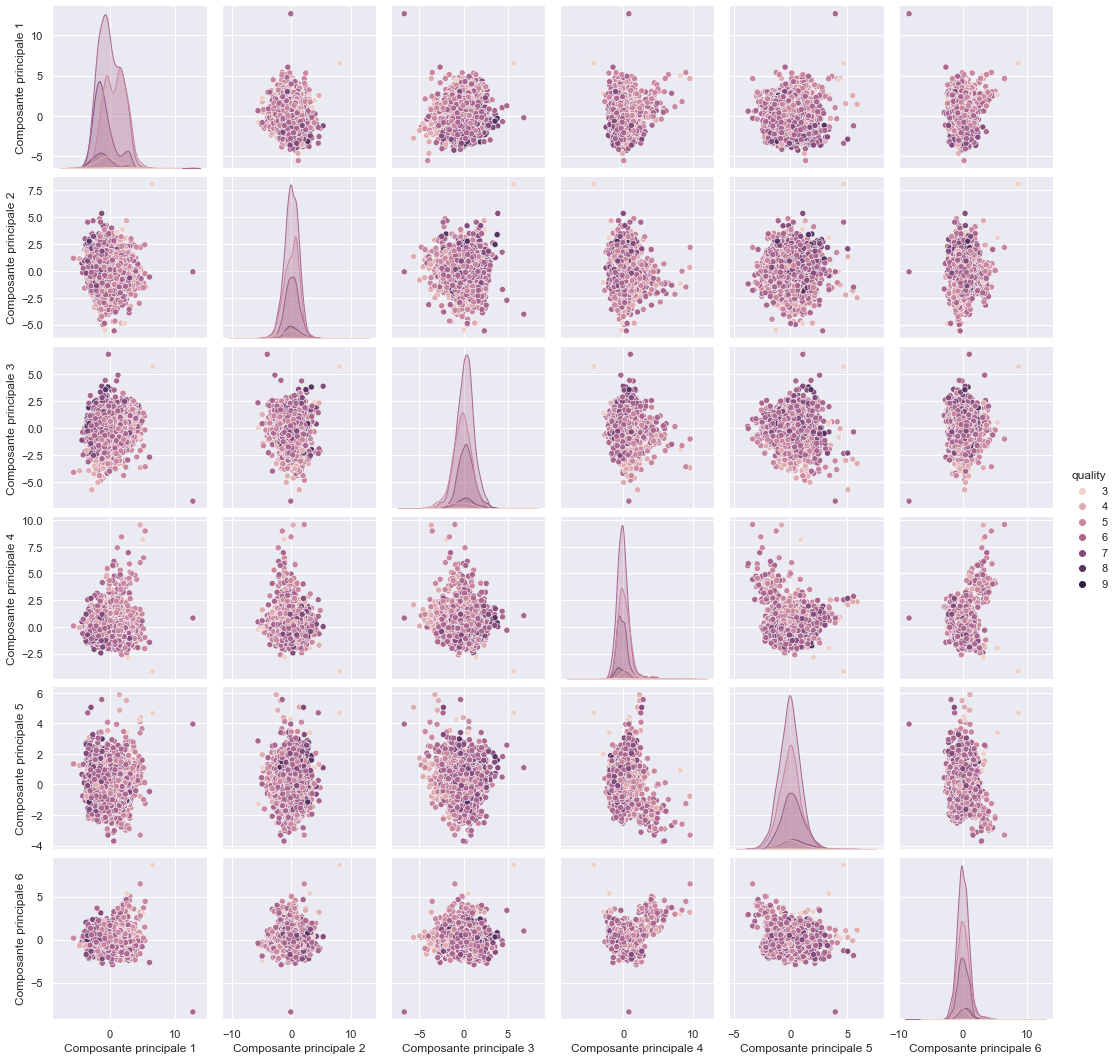

In [58]:
sns.pairplot(pd.concat([pca_white_wine_df,data_white_wine["quality"]], axis=1), hue='quality')

#### d) Classification
On va alors faire un comparatif de performances pour la classification de ces classes, en utilisant les données d'origine et ensuite en utilisant les 6 composantes principales qu'on a eu. Je vais alors appliquer les modèles suivants : 
- KNN
- SVM 
- Stochastic Gradient Descent
- Gaussian Processes
- Gaussian Naive Bayes
- Random Forrest
- MLP

Et eventuellement 
- Ensemble method alliant les algorithmes donnant les meilleurs résultats

##### Subdivision du dataset en test et entrainement

In [7]:
etiq = data_white_wine["quality"]
fv_train, fv_test, etiq_train, etiq_test = train_test_split(data_wine_white_features, etiq, test_size=0.3,random_state=23)
fv_train_pca, fv_test_pca, etiq_train, etiq_test = train_test_split(pca_white_wine_df, etiq, test_size=0.3,random_state=23)

##### KNN 
En utilisant Grid Search pour le choix des paramètres optimisant le résultat de classification
##### Variables de base


In [21]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(fv_train,etiq_train)
knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(fv_train,etiq_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


KNeighborsClassifier(n_neighbors=1, p=1)

In [22]:
yknn=knn.predict(fv_test)
print("Taux de précision KNN lors des tests : ",metrics.accuracy_score(etiq_test, yknn))

Taux de précision KNN lors des tests :  0.5802721088435374


On trouve un résultat assez décevant, on analyse la matrice de corrélation pour observer les problèmes de classification

<AxesSubplot:>

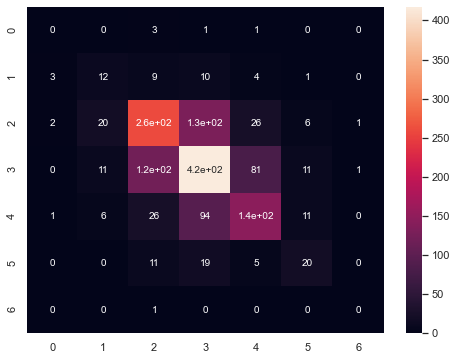

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn), annot=True, annot_kws={"size": 10})

##### Composantes principales

In [23]:
clf = GridSearchCV(knn, parameters)
clf.fit(fv_train_pca,etiq_train)
knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(fv_train_pca,etiq_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


KNeighborsClassifier(n_neighbors=1)

In [24]:
yknn_pca=knn.predict(fv_test_pca)
print("Taux de précision KNN lors des tests : ",metrics.accuracy_score(etiq_test, yknn_pca))

Taux de précision KNN lors des tests :  0.6170068027210884


On observe bien que la réduction de la dimensionnalité de notre problème nous a permis d'avoir de meilleurs résultats dans la classification, on peut maintenant observer la matrice de confusion avec les composantes principales

<AxesSubplot:>

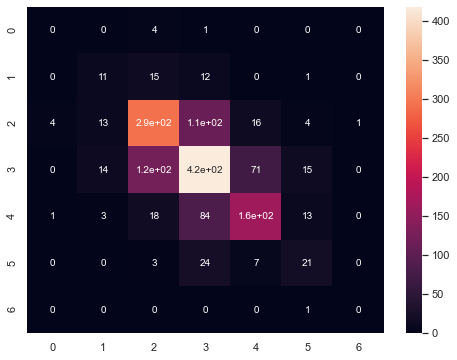

In [51]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn_pca), annot=True, annot_kws={"size": 10})

On peut avoir un comparatif des deux matrices de confusions et on retrouve alors : 

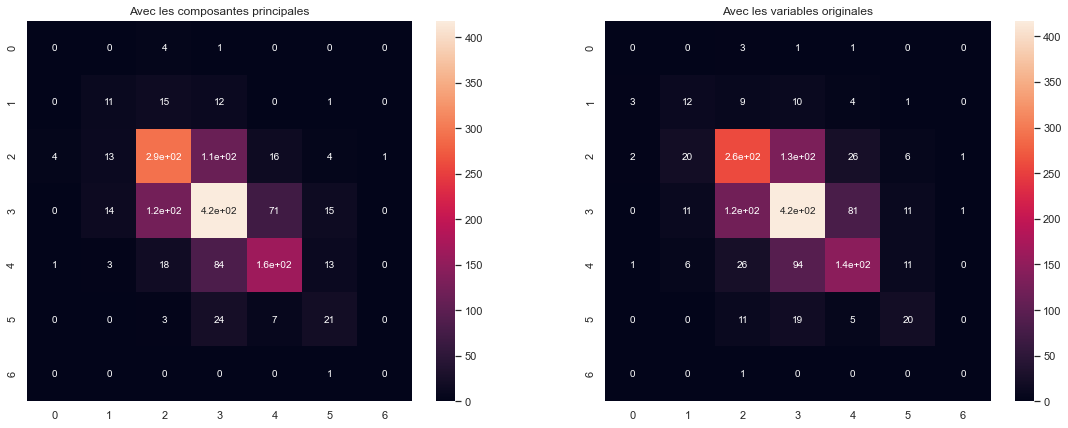

In [53]:
plt.figure(figsize=(19,7))
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn_pca), annot=True, annot_kws={"size": 10})
plt.title("Avec les composantes principales")
plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn), annot=True, annot_kws={"size": 10})
plt.title("Avec les variables originales")
plt.show()

##### SVM

In [25]:
# Variables originales
parameters = {'degree':np.arange(1,20,1)}
svm=SVC(gamma='scale', class_weight='balanced')
clf = GridSearchCV(svm, parameters)
clf.fit(fv_train,etiq_train)
svm=SVC(**clf.best_params_)
svm.fit(fv_train,etiq_train)
ysvm=svm.predict(fv_test)
print("Taux de précision SVM avec variables originales lors des tests : ",metrics.accuracy_score(etiq_test, ysvm))

# Composantes principales
svm_pca=SVC(gamma = 'scale', class_weight='balanced')
clf = GridSearchCV(svm, parameters)
clf.fit(fv_train_pca,etiq_train)
svm_pca=SVC(**clf.best_params_)
svm_pca.fit(fv_train_pca,etiq_train)
ysvm_pca=svm_pca.predict(fv_test_pca)
print("Taux de précision SVM avec les composantes principales lors des tests : ",metrics.accuracy_score(etiq_test, ysvm_pca))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Taux de précision SVM avec variables originales lors des tests :  0.4380952380952381


C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Taux de précision SVM avec les composantes principales lors des tests :  0.5360544217687074


Même constat que précédemment, on voit bien que la réduction de dimensions a amelioré notre classification, mais néanmoins les résultats sont assez faibles. On analyse maintenant la matrice de confusion entre les deux essais

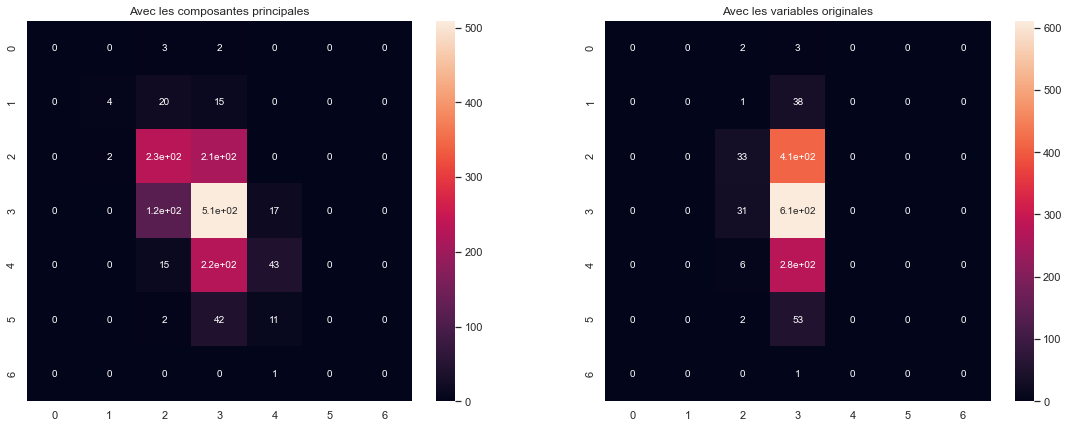

In [56]:
plt.figure(figsize=(19,7))
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(etiq_test, ysvm_pca), annot=True, annot_kws={"size": 10})
plt.title("Avec les composantes principales")
plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(etiq_test, ysvm), annot=True, annot_kws={"size": 10})
plt.title("Avec les variables originales")
plt.show()

##### Gradient Boosting
##### Avec les paramètres de bases

In [ ]:
parameters = {'n_estimators': np.arange(100,300,5), 'criterion' : ['friedman_mse', 'squared_error', 'mse']}
gBoost=GradientBoostingClassifier(random_state=0)
clf = GridSearchCV(gBoost, parameters)
clf.fit(fv_train,etiq_train)
gBoost=GradientBoostingClassifier(**clf.best_params_)
gBoost.fit(fv_train,etiq_train)
ygBoost=gBoost.predict(fv_test)
print("Taux de précision du Gradient Boosting avec variables originales lors des tests : ",metrics.accuracy_score(etiq_test, ygBoost))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in

Taux de précision du Gradient Boosting avec variables originales lors des tests :  0.6265306122448979


Text(0.5, 1.0, 'Matrice de confusion Gradient Boosting')

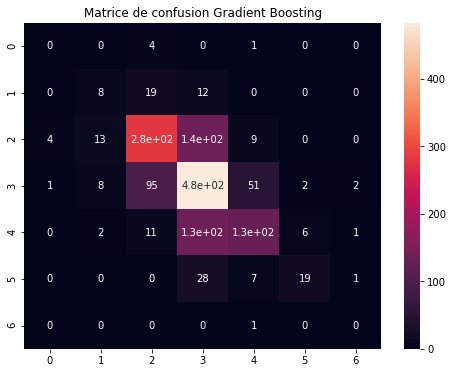

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ygBoost), annot=True, annot_kws={"size": 10})
plt.title("Matrice de confusion Gradient Boosting")

##### Avec les composantes principales

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in

Taux de précision du Gradient Boosting avec les composantes principales lors des tests :  0.5836734693877551


Text(0.5, 1.0, 'Matrice de confusion Gradient Boosting')

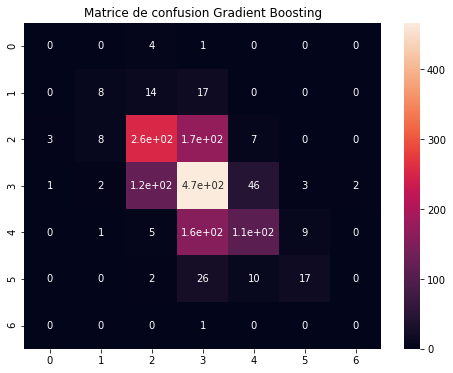

In [40]:
gBoost_pca=GradientBoostingClassifier(random_state=0)
clf = GridSearchCV(gBoost_pca, parameters)
clf.fit(fv_train_pca,etiq_train)
gBoost_pca=GradientBoostingClassifier(**clf.best_params_)
gBoost_pca.fit(fv_train_pca,etiq_train)
ygBoost_pca=gBoost_pca.predict(fv_test_pca)
print("Taux de précision du Gradient Boosting avec les composantes principales lors des tests : ",metrics.accuracy_score(etiq_test, ygBoost_pca))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ygBoost_pca), annot=True, annot_kws={"size": 10})
plt.title("Matrice de confusion Gradient Boosting")

##### Gaussian Processes

Taux de précision lors des tests avec les variables de bases :  0.5795918367346938
Taux de précision lors des tests avec les composantes principales:  0.5625850340136055


Text(0.5, 1.0, 'Avec les variables originales')

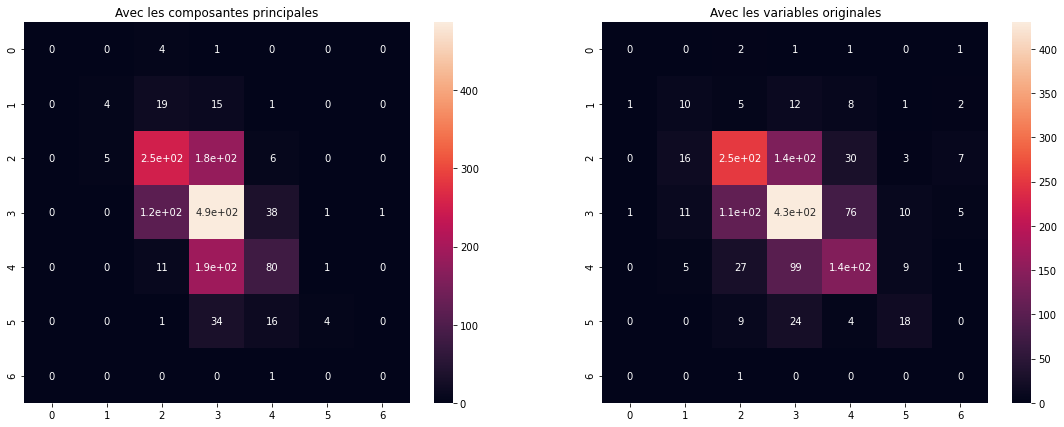

In [27]:
gpc = GaussianProcessClassifier().fit(fv_train,etiq_train)
ygpc = gpc.predict(fv_test)
print("Taux de précision lors des tests avec les variables de bases : ",metrics.accuracy_score(etiq_test, ygpc))

gpc_pca = GaussianProcessClassifier().fit(fv_train_pca,etiq_train)
ygpc_pca = gpc_pca.predict(fv_test_pca)
print("Taux de précision lors des tests avec les composantes principales: ",metrics.accuracy_score(etiq_test, ygpc_pca))

plt.figure(figsize=(19,7))
plt.title("Matrices de confusion avec des processus gaussiens")
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(etiq_test, ygpc_pca), annot=True, annot_kws={"size": 10})
plt.title("Avec les composantes principales")
plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(etiq_test, ygpc), annot=True, annot_kws={"size": 10})
plt.title("Avec les variables originales")

On voit bien qu'à ce niveau, l'algorithme n'a pas été assez efficace et l'utilisation ou pas de selection de paramètres n'a pas influé, encore pire, elle a diminué de la précision qu'on voulait avoir
##### Gaussian Naive Bayes

Taux de précision lors des tests avec les variables de bases :  0.45102040816326533
Taux de précision lors des tests avec les composantes principales :  0.4598639455782313


Text(0.5, 1.0, 'Avec les variables originales')

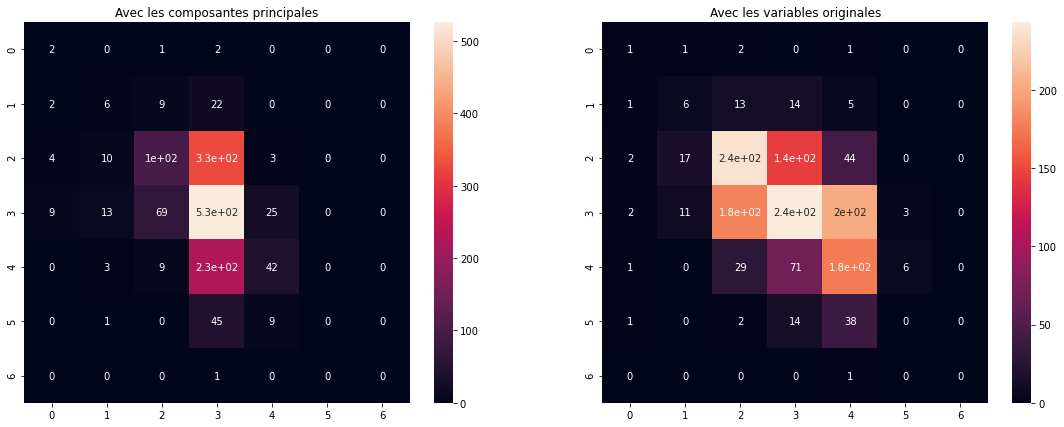

In [28]:
gaussNaive = GaussianNB().fit(fv_train,etiq_train)
ygaussNaive = gaussNaive.predict(fv_test)
print("Taux de précision lors des tests avec les variables de bases : ",metrics.accuracy_score(etiq_test, ygaussNaive))

gaussNaive_pca = GaussianNB().fit(fv_train_pca,etiq_train)
ygaussNaive_pca = gaussNaive_pca.predict(fv_test_pca)
print("Taux de précision lors des tests avec les composantes principales : ",metrics.accuracy_score(etiq_test, ygaussNaive_pca))

plt.figure(figsize=(19,7))
plt.title("Matrices de confusion avec des processus gaussiens")
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(etiq_test, ygaussNaive_pca), annot=True, annot_kws={"size": 10})
plt.title("Avec les composantes principales")
plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(etiq_test, ygaussNaive), annot=True, annot_kws={"size": 10})
plt.title("Avec les variables originales")

Même constat que l'algorithme précédent, on retrouve des résultats assez faible, preuve de l'impact du déséquilibre entre les classes, on voit effectivement que les classes les plus représentées sont bien classées par contre toutes les autres classes sont négligées
##### Random Forrest

In [29]:
forrest = RandomForestClassifier(n_estimators = 300, max_features = 'log2', criterion = 'gini', class_weight='balanced').fit(fv_train,etiq_train)
yforrest = forrest.predict(fv_test)
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, yforrest))

forrest_pca = RandomForestClassifier(n_estimators = 300, max_features = 'log2', criterion = 'gini', class_weight='balanced').fit(fv_train_pca,etiq_train)
yforrest_pca = forrest_pca.predict(fv_test_pca)
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, yforrest_pca))

Taux de précision lors des tests :  0.6857142857142857
Taux de précision lors des tests :  0.64421768707483


Comme prévu, les algorithmes basés sur des arbres de décisions sont plus efficaces sur des problèmes de classes déséquilibrées, et on voit que le fait d'avoir appliqué une PCA a diminué de la précision, on va observer les matrices de confusion. 

Text(0.5, 1.0, 'Avec les variables originales')

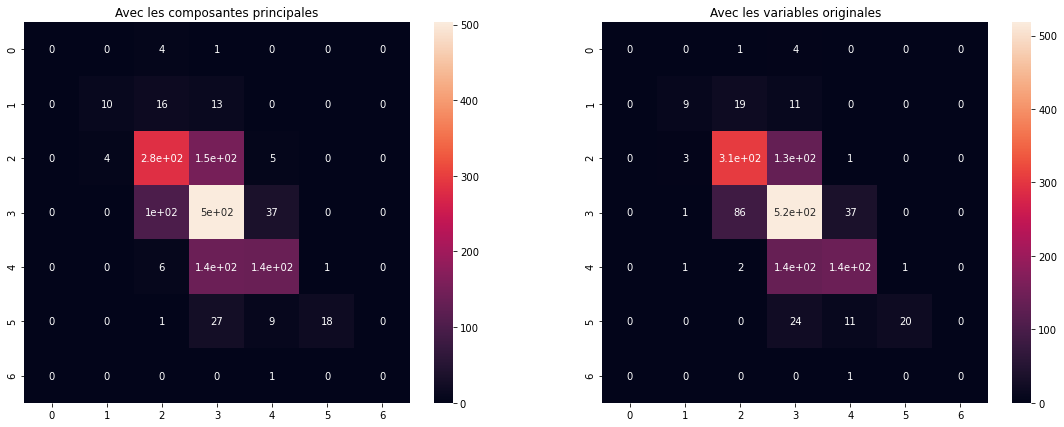

In [17]:
plt.figure(figsize=(19,7))
plt.title("Matrices de confusion avec des processus gaussiens")
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest_pca), annot=True, annot_kws={"size": 10})
plt.title("Avec les composantes principales")
plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest), annot=True, annot_kws={"size": 10})
plt.title("Avec les variables originales")

##### MLP

In [30]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-4, activation='tanh', max_iter = 1000 , hidden_layer_sizes=(100,100, 50,14,7), random_state=0).fit(fv_train,etiq_train)
ymlp = mlp.predict(fv_test)
print("Taux de précision lors de l'entrainement : ",metrics.accuracy_score(etiq_train, mlp.predict(fv_train)))
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, ymlp))

Taux de précision lors de l'entrainement :  0.543757292882147
Taux de précision lors des tests :  0.5340136054421769


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [31]:
mlp_pca = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu', max_iter = 1000 , hidden_layer_sizes=(70,50, 38), random_state=0).fit(fv_train_pca,etiq_train)
ymlp_pca = mlp_pca.predict(fv_test_pca)
print("Taux de précision lors de l'entrainement : ",metrics.accuracy_score(etiq_train, mlp_pca.predict(fv_train_pca)))
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, ymlp_pca))

Taux de précision lors de l'entrainement :  1.0
Taux de précision lors des tests :  0.5795918367346938


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0.5, 1.0, 'Avec les variables originales')

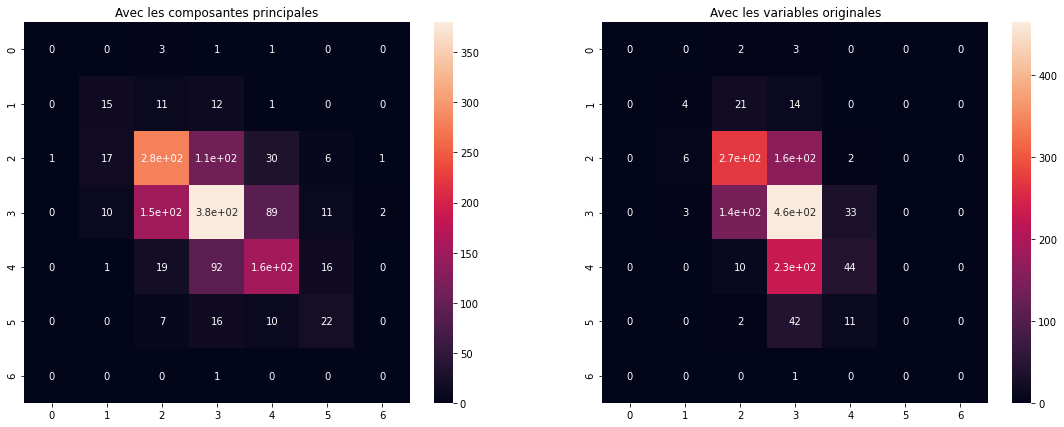

In [34]:
plt.figure(figsize=(19,7))
plt.title("Matrices de confusion avec un réseau de neurones multicouches")
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(etiq_test, ymlp_pca), annot=True, annot_kws={"size": 10})
plt.title("Avec les composantes principales")
plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(etiq_test, ymlp), annot=True, annot_kws={"size": 10})
plt.title("Avec les variables originales")

#### Extremely randomized tree classifiers

In [32]:
extra = ExtraTreesClassifier(n_estimators=275, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=None, random_state=0, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(fv_train,etiq_train)
yextra = extra.predict(fv_test)
print("Taux de précision lors de l'entrainement : ",metrics.accuracy_score(etiq_train, extra.predict(fv_train)))
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, yextra))

Taux de précision lors de l'entrainement :  1.0
Taux de précision lors des tests :  0.6843537414965987


Text(0.5, 1.0, 'Matrice de confusion Extremely randomized tree')

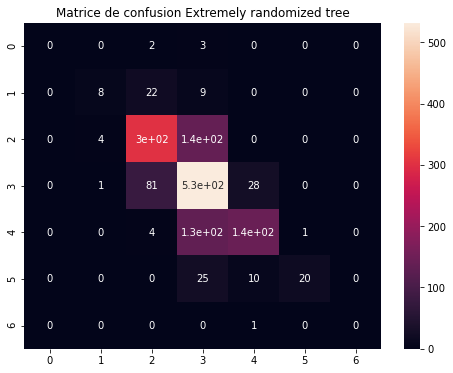

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yextra), annot=True, annot_kws={"size": 10})
plt.title("Matrice de confusion Extremely randomized tree")

Taux de précision lors de l'entrainement :  1.0
Taux de précision lors des tests :  0.654421768707483


Text(0.5, 1.0, 'Matrice de confusion Extremely randomized tree')

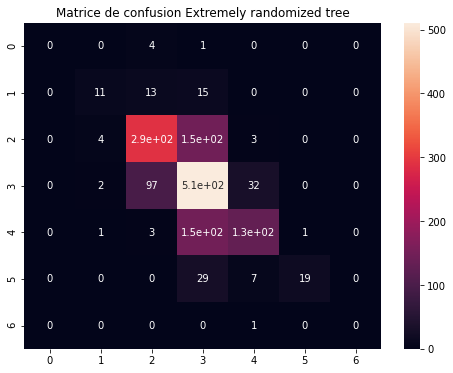

In [33]:
extra_pca = ExtraTreesClassifier(n_estimators=275, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=None, random_state=0, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(fv_train_pca,etiq_train)
yextra_pca = extra_pca.predict(fv_test_pca)
print("Taux de précision lors de l'entrainement : ",metrics.accuracy_score(etiq_train, extra_pca.predict(fv_train_pca)))
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, yextra_pca))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yextra_pca), annot=True, annot_kws={"size": 10})
plt.title("Matrice de confusion Extremely randomized tree")

Les tests des performances ont été fait en se basant sur la précision, mais étant un problème où les classes sont grandement déséquilibrée, on va s'orienter plus vers d'autres tests de performances :
- F1 Score

Après que cela soit fait, on tente un resampling pour nous permettre d'équilibrer un peu mieux nos classes
#### F1-score
#### Variables de bases

In [39]:
print("F1 score KNN : ",metrics.f1_score(etiq_test, yknn, average='weighted'))
print("F1 score SVM : ",metrics.f1_score(etiq_test, ysvm, average='weighted'))
#print("F1 score KNN : ",metrics.f1_score(etiq_test, yknn, average='weighted'))
print("F1 score Gaussian Processes : ",metrics.f1_score(etiq_test, ygpc, average='weighted'))
print("F1 score Gaussian Naive Bayes : ",metrics.f1_score(etiq_test, ygaussNaive, average='weighted'))
print("F1 score Random Forrest : ",metrics.f1_score(etiq_test, yforrest, average='weighted'))
print("F1 score MLP : ",metrics.f1_score(etiq_test, ymlp, average='weighted'))
print("F1 score Extremely randomized tree : ",metrics.f1_score(etiq_test, yextra, average='weighted'))

F1 score KNN :  0.5804740257199368
F1 score SVM :  0.30042022813430347
F1 score Gaussian Processes :  0.5798328173345615
F1 score Gaussian Naive Bayes :  0.4410892333309371
F1 score Random Forrest :  0.6733957299466491
F1 score MLP :  0.49410786965897624
F1 score Extremely randomized tree :  0.6735686189591545


#### Composantes principales

In [49]:
print("F1 score KNN : ",metrics.f1_score(etiq_test, yknn_pca, average='weighted'))
print("F1 score SVM : ",metrics.f1_score(etiq_test, ysvm_pca, average='weighted'))
#print("F1 score KNN : ",metrics.f1_score(etiq_test, yknn_pca, average='weighted'))
print("F1 score Gaussian Processes : ",metrics.f1_score(etiq_test, ygpc_pca, average='weighted'))
print("F1 score Gaussian Naive Bayes : ",metrics.f1_score(etiq_test, ygaussNaive_pca, average='weighted'))
print("F1 score Random Forrest : ",metrics.f1_score(etiq_test, yforrest_pca, average='weighted'))
print("F1 score MLP : ",metrics.f1_score(etiq_test, ymlp_pca, average='weighted'))
print("F1 score Extremely randomized tree : ",metrics.f1_score(etiq_test, yextra_pca, average='weighted'))

F1 score KNN :  0.6169081460138364
F1 score SVM :  0.4900839034103254
F1 score Gaussian Processes :  0.536021985598433
F1 score Gaussian Naive Bayes :  0.4013172863767871
F1 score Random Forrest :  0.6323452274181918
F1 score MLP :  0.579518166905577
F1 score Extremely randomized tree :  0.6444682322713483


Ces résultats obtenus, on va tenter de les améliorer avec des méthodes pour les classes déséquilibrées en pénalisant les classes les plus représentées et en mettant en avant les classes les moins représentées 
#### e) Re-sampling 
Pour se faire il y a deux méthodes : 
- Up-sample les classes minoritaires
- Down-sample les classes prioritaire
#### Up-sampling

In [56]:
# Division du dataframe suivant les classes
data_white_wine_resampling = data_white_wine.copy()
data_class1 = data_white_wine_resampling[data_white_wine_resampling["quality"]==3]
data_class2 = data_white_wine_resampling[data_white_wine_resampling["quality"]==4]
data_class3 = data_white_wine_resampling[data_white_wine_resampling["quality"]==5]
data_class4 = data_white_wine_resampling[data_white_wine_resampling["quality"]==6]
data_class5 = data_white_wine_resampling[data_white_wine_resampling["quality"]==7]
data_class6 = data_white_wine_resampling[data_white_wine_resampling["quality"]==8]
data_class7 = data_white_wine_resampling[data_white_wine_resampling["quality"]==9]

In [65]:
print("Classe 1 contient ",data_class1["quality"].count(), " élements")
print("Classe 2 contient ",data_class2["quality"].count(), " élements")
print("Classe 3 contient ",data_class3["quality"].count(), " élements")
print("Classe 4 contient ",data_class4["quality"].count(), " élements")
print("Classe 5 contient ",data_class5["quality"].count(), " élements")
print("Classe 6 contient ",data_class6["quality"].count(), " élements")
print("Classe 7 contient ",data_class7["quality"].count(), " élements")

Classe 1 contient  20  élements
Classe 2 contient  163  élements
Classe 3 contient  1457  élements
Classe 4 contient  2198  élements
Classe 5 contient  880  élements
Classe 6 contient  175  élements
Classe 7 contient  5  élements


On va donc faire de l'augmentation de données au niveau de : 
- La classe 1 : on passera de 20 à 100 élements
- La classe 2 : on passera de 163 à 400 éléments
- La classe 5 : on passera de 880 à 1500 éléments
- La classe 6 : on passera de 175 à 500 éléments
- La classe 7 : on passera de 5 à 50 éléments

In [66]:
# On ressample les données
data_class1_upsample = resample(data_class1, replace=True, n_samples=100,random_state=123)
data_class2_upsample = resample(data_class2, replace=True, n_samples=400,random_state=123)
data_class5_upsample = resample(data_class5, replace=True, n_samples=1500,random_state=123)
data_class6_upsample = resample(data_class6, replace=True, n_samples=500,random_state=123)
data_class7_upsample = resample(data_class7, replace=True, n_samples=50,random_state=123)

In [67]:
print("Classe 1 contient ",data_class1_upsample["quality"].count(), " élements")
print("Classe 2 contient ",data_class2_upsample["quality"].count(), " élements")
print("Classe 3 contient ",data_class3["quality"].count(), " élements")
print("Classe 4 contient ",data_class4["quality"].count(), " élements")
print("Classe 5 contient ",data_class5_upsample["quality"].count(), " élements")
print("Classe 6 contient ",data_class6_upsample["quality"].count(), " élements")
print("Classe 7 contient ",data_class7_upsample["quality"].count(), " élements")

Classe 1 contient  100  élements
Classe 2 contient  400  élements
Classe 3 contient  1457  élements
Classe 4 contient  2198  élements
Classe 5 contient  1500  élements
Classe 6 contient  500  élements
Classe 7 contient  50  élements


In [69]:
data_white_wine_balanced = pd.concat([data_class1_upsample,data_class2_upsample,data_class3,data_class4,data_class5_upsample, data_class6_upsample, data_class7_upsample])
data_white_wine_balanced["quality"].count()

6205

In [70]:
data_white_wine_balanced.groupby("quality").count()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                  100               100          100             100   
4                  400               400          400             400   
5                 1457              1457         1457            1457   
6                 2198              2198         2198            2198   
7                 1500              1500         1500            1500   
8                  500               500          500             500   
9                   50                50           50              50   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
quality                                                                        
3              100                  100                   100      100   100   
4              400                  400                   400      400   400   
5             1457                 1457                  1457     1457  1457   
6             2198                 2198                  2198     2198  2198   
7             1500                 1500                  1500     1500  1500   
8              500                  500                   500      500   500   
9               50                   50                    50       50    50   

         sulphates  alcohol  
quality                      
3              100      100  
4              400      400  
5             1457     1457  
6             2198     2198  
7             1500     1500  
8              500      500  
9               50       50

Maintenant le resampling fait on va repartager le dataset pour l'entraînement et le test et on observe les nouveaux résultats d'abord avec les variables de bases, par la suite on voit avec une réduction de paramètres